In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import Quandl
%pylab inline
sb.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


In [79]:
data = Quandl.get(["BCB/433", "BCB/7845"], trim_start="1999-01-01")

In [80]:
data.columns = ["IPCA", "IBOVESPA"]

In [81]:
data.head()

,IPCA,IBOVESPA
Date,,
1999-01-31,0.70,8171
1999-02-28,1.05,8910
1999-03-31,1.10,10696
1999-04-30,0.56,11350
1999-05-31,0.30,11089


In [82]:
data["IBOVESPA"].diff().shift(-1).head()

Date
1999-01-31     739
1999-02-28    1786
1999-03-31     654
1999-04-30    -261
1999-05-31     537
Name: IBOVESPA, dtype: float64

In [83]:
data["IBOVESPA"].head()

Date
1999-01-31     8171
1999-02-28     8910
1999-03-31    10696
1999-04-30    11350
1999-05-31    11089
Name: IBOVESPA, dtype: float64

In [84]:
data["IBOVESPA_D"] = (data["IBOVESPA"].diff().shift(-1)/data["IBOVESPA"]).shift()

In [85]:
data.head()

,IPCA,IBOVESPA,IBOVESPA_D
Date,,,
1999-01-31,0.70,8171,NaN
1999-02-28,1.05,8910,0.090442
1999-03-31,1.10,10696,0.200449
1999-04-30,0.56,11350,0.061144
1999-05-31,0.30,11089,-0.022996


In [86]:
# (data["IBOVESPA"][0]*(1 + data["IBOVESPA_D"]).shift(-1)).shift().head()
data["IBOVESPA"][0]*(np.cumprod((1 + data["IBOVESPA_D"]).shift(-1)).shift()).head()

Date
1999-01-31      NaN
1999-02-28     8910
1999-03-31    10696
1999-04-30    11350
1999-05-31    11089
Name: IBOVESPA_D, dtype: float64

In [87]:
data["IBOVESPA_D_DEFL"] = (1 + data["IBOVESPA_D"])/(1 + data["IPCA"]/100) - 1
data.tail()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL
Date,,,,
2015-04-30,0.71,56229,0.099296,0.091546
2015-05-31,0.74,52760,-0.061694,-0.068587
2015-06-30,0.79,53080,0.006065,-0.001820
2015-07-31,0.62,50864,-0.041748,-0.047653
2015-08-31,0.22,46625,-0.083340,-0.085352


In [88]:
data.head()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL
Date,,,,
1999-01-31,0.70,8171,NaN,NaN
1999-02-28,1.05,8910,0.090442,0.079111
1999-03-31,1.10,10696,0.200449,0.187388
1999-04-30,0.56,11350,0.061144,0.055235
1999-05-31,0.30,11089,-0.022996,-0.025918


In [89]:
data["IBOVESPA_DEFL"] = data["IBOVESPA"][0]*(np.cumprod((1 + data["IBOVESPA_D_DEFL"]).shift(-1)).shift())

In [90]:
data["IBOVESPA_DEFL"][0] = data["IBOVESPA"][0]

In [91]:
data.head()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL,IBOVESPA_DEFL
Date,,,,,
1999-01-31,0.70,8171,NaN,NaN,8171.000000
1999-02-28,1.05,8910,0.090442,0.079111,8817.417120
1999-03-31,1.10,10696,0.200449,0.187388,10469.692365
1999-04-30,0.56,11350,0.061144,0.055235,11047.986208
1999-05-31,0.30,11089,-0.022996,-0.025918,10761.646256


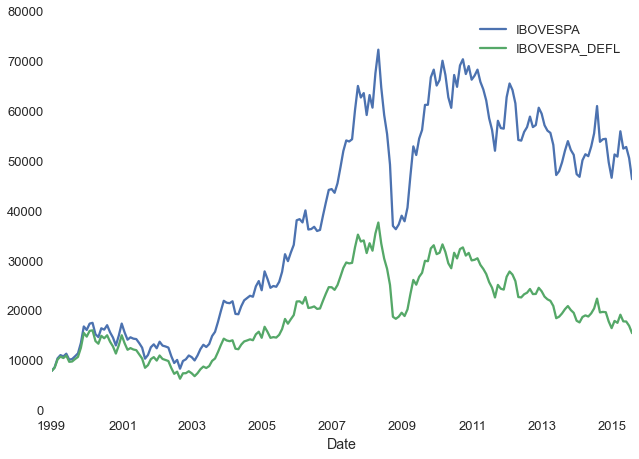

In [92]:
data[["IBOVESPA", "IBOVESPA_DEFL"]].plot();

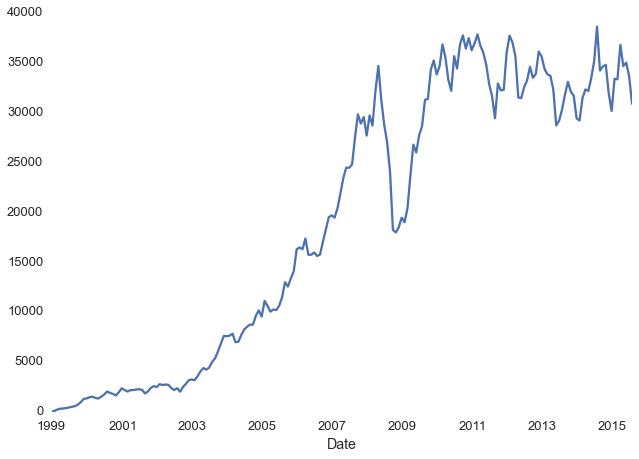

In [93]:
(data["IBOVESPA"]-data["IBOVESPA_DEFL"]).plot();